
# Project: 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#model">Classification Models</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> Source : [Kaggle](https://www.kaggle.com/pankajjsh06/ibm-watson-marketing-customer-value-data)

- Using IBM Watson Analytics, you can predict behavior to retain your customers. You can analyze all relevant customer data and develop focused customer retention programs.

- Inspiration
Understand customer demographics and buying behavior. Use predictive analytics to analyze the most profitable customers and how they interact. Take targeted actions to increase profitable customer response, retention, and growth.

>  Credits :
- [Hands-On Data Science for Marketing
Book](https://www.packtpub.com/product/hands-on-data-science-for-marketing/9781789346343)
, some of the code sources are from the book.
- Also some of the code used in the classification prediction model is from IBM ML course provided by Coursera

> **Objective** of the Dataset analysis:
TO predict whether or not customers' will engage in the marketing campaign.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline

In [3]:
sb.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})

In [4]:
import warnings
warnings.simplefilter("ignore")

In [5]:
df = pd.read_csv(r'D:\Downloads\Data Sources\WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/2011,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/2011,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/2011,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/2011,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/2011,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


 
| Column name   | Desc         |
|:------------- |:-------------| 
|Customer  |string  Customer ID "BU79786" "QZ44356" "AI49188" "WW63253" ...  | 
|State |string  "Washington" "Arizona" "Nevada" "California" "Oregon" |
|Customer.Lifetime.Value|Numerical|
|Response| string, Customer's response to marketing campaign (yes , No)|
|Coverage|string,  "Basic" "Extended" "Premium" "Basic" |
|Education |string, Customer's Education |
|Effective.To.Date| Date since customer's acquisition   |
|EmploymentStatus|String, employed, unemployed , retired, ... |
|Gender|Sting, Male (m), Female (f)|
|Income|Numerical,  Customer's yearly income|
|Location.Code  |String, Suburban, Rural, Urban|
|Marital.Status|String, married , single , divorced |
|Monthly.Premium.Auto|Numerical, |
|Months.Since.Last.Claim|Numerical, |
|Months.Since.Policy.Inception|Numerical |
|Number.of.Open.Complaints|Numerical|
|Number.of.Policies|Numerical|
|Policy.Type |String, "Corporate Auto", "Personal Auto", ... |
|Policy| String, "Corporate L3" "Personal L3", ...|
|Renew.Offer.Type |String, "Offer1" "Offer2", ... |
|Sales.Channel |String,"Agent" "Call Center" ... |
|Total.Claim.Amount|Numerical|
|Vehicle.Class  |String,  "Two-Door Car" "Four-Door Car", ...|
|Vehicle.Size |String,  "small", "Medsize", "large"|


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [6]:
df.shape

(9134, 24)

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [7]:
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [7]:
df.describe(include='object')

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
count,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134
unique,9134,5,2,3,5,59,5,2,3,3,3,9,4,4,6,3
top,XV53746,California,No,Basic,Bachelor,1/10/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize
freq,1,3150,7826,5568,2748,195,5698,4658,5779,5298,6788,3426,3752,3477,4621,6424


In [31]:
df.nunique().sort_values()

Response                            2
Gender                              2
Marital Status                      3
Policy Type                         3
Location Code                       3
Vehicle Size                        3
Coverage                            3
Sales Channel                       4
Renew Offer Type                    4
EmploymentStatus                    5
Education                           5
State                               5
Vehicle Class                       6
Number of Open Complaints           6
Policy                              9
Number of Policies                  9
Months Since Last Claim            36
Effective To Date                  59
Months Since Policy Inception     100
Monthly Premium Auto              202
Total Claim Amount               5106
Income                           5694
Customer Lifetime Value          8041
Customer                         9134
dtype: int64

In [9]:
df.duplicated().sum()

0

<a id='eda'></a>
## Exploratory Data Analysis


### Research Questions

- Overall engagement rate

- Engagement rates by offer type

- Engagement rates by offer type and vehicle class

- Engagement rates by sales channel

- Engagement rates by sales channel and vehicle size

- Engagement rates by Income bins

In [8]:
#Overall engagement rate
df['Response'].value_counts(normalize=True)

No     0.856799
Yes    0.143201
Name: Response, dtype: float64

In [15]:
# Engagement rates by offer type
df_offer = df.loc[
    df['Response'] == 'Yes'].groupby('Renew Offer Type').count()['Customer']/df.groupby('Renew Offer Type').count()['Customer']
df_offer

Renew Offer Type
Offer1    0.158316
Offer2    0.233766
Offer3    0.020950
Offer4         NaN
Name: Customer, dtype: float64

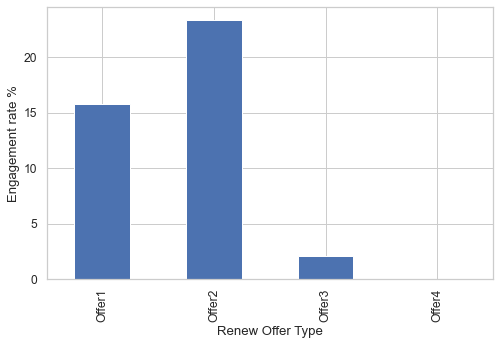

In [18]:
(df_offer*100).plot(kind = 'bar')
plt.ylabel('Engagement rate %');

>Offer2 had the highest engagement rate among the customers.

In [21]:
#Engagement rates by offer type and vehicle class
df_offer_vehicle = df.loc[
    df['Response'] == 'Yes'].groupby(['Renew Offer Type', 'Vehicle Class']).count()['Customer']/df.groupby(
    'Renew Offer Type').count()['Customer']
df_offer_vehicle.to_frame()

Customer
Renew Offer Type Vehicle Class          
Offer1           Four-Door Car  0.070362
                 Luxury Car     0.001599
                 Luxury SUV     0.004797
                 SUV            0.044776
                 Sports Car     0.011194
                 Two-Door Car   0.025586
Offer2           Four-Door Car  0.114833
                 Luxury Car     0.002051
                 Luxury SUV     0.004101
                 SUV            0.041012
                 Sports Car     0.016405
                 Two-Door Car   0.055366
Offer3           Four-Door Car  0.016760
                 Two-Door Car   0.004190

In [22]:
df_offer_vehicle = df_offer_vehicle.unstack().fillna(0)
df_offer_vehicle

Vehicle Class,Four-Door Car,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car
Renew Offer Type,,,,,,
Offer1,0.070362,0.001599,0.004797,0.044776,0.011194,0.025586
Offer2,0.114833,0.002051,0.004101,0.041012,0.016405,0.055366
Offer3,0.016760,0.000000,0.000000,0.000000,0.000000,0.004190


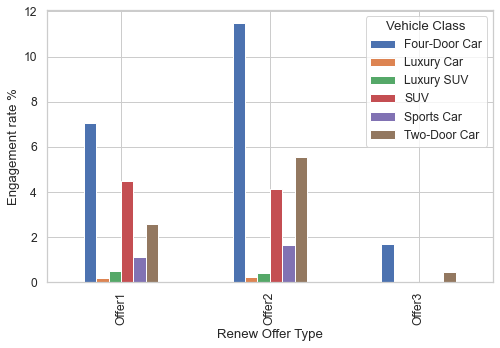

In [24]:
(df_offer_vehicle*100).plot(kind = 'bar')
plt.ylabel('Engagement rate %');

> offer 2 customers owning a 4 door car seem to be the highest in engagement rate

In [29]:
df_sales_channel = df.groupby('Sales Channel')['Engaged'].mean()
df_sales_channel

Sales Channel
Agent          0.191544
Branch         0.114531
Call Center    0.108782
Web            0.117736
Name: Engaged, dtype: float64

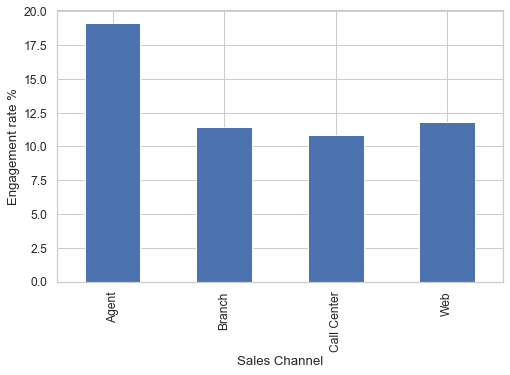

In [32]:
#Engagement rate by sales channel  
(df_sales_channel*100).plot(kind = 'bar')
plt.ylabel('Engagement rate %');

> Customers' engagementrate is higher through "agent" sales channel 19% while call center is the lowest about 11%

In [39]:
# grouping customers'vehicle size with which sales channel engagement rate
by_sales_channel_df = df.loc[
    df['Response'] == 'Yes'].groupby([
    'Sales Channel', 'Vehicle Size']).count()['Customer']/df.groupby('Sales Channel').count()['Customer']
by_sales_channel_df.to_frame()


Customer
Sales Channel Vehicle Size          
Agent         Large         0.020708
              Medsize       0.144953
              Small         0.025884
Branch        Large         0.021036
              Medsize       0.074795
              Small         0.018699
Call Center   Large         0.013598
              Medsize       0.067989
              Small         0.027195
Web           Large         0.013585
              Medsize       0.095094
              Small         0.009057

In [41]:
by_sales_channel_df = by_sales_channel_df.unstack().fillna(0)

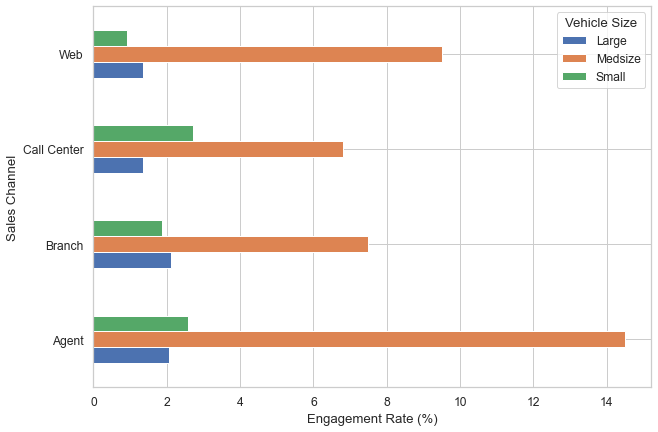

In [42]:
ax = (by_sales_channel_df*100.0).plot(
    kind='barh',
    figsize=(10, 7),
)
ax.set_xlabel('Engagement Rate (%)')
plt.show()

> Customers with Medsized vehicles have the highest engagement rate through agent then web then branch

In [16]:
df['Income'].value_counts(bins = 5)

(-99.982, 19996.2]    2839
(19996.2, 39992.4]    2274
(39992.4, 59988.6]    1540
(59988.6, 79984.8]    1457
(79984.8, 99981.0]    1024
Name: Income, dtype: int64

In [23]:
df['Income_bin'] = pd.cut(df['Income'], bins=[0,19990, 29990, 39990, 59990, 79990, np.inf],
                          labels=['<20k','20k - <30k', ' 30k - <40k', '40k - <60','60k - <80' ,'<100'])

In [25]:
df['Income_bin'].describe()

count          6817
unique            6
top       40k - <60
freq           1540
Name: Income_bin, dtype: object

In [43]:
by_sales_channel_income = df.loc[
    df['Response'] == 'Yes'].groupby([
    'Sales Channel', 'Income_bin']).count()['Customer']/df.groupby('Sales Channel').count()['Customer']
by_sales_channel_income.to_frame()


Customer
Sales Channel Income_bin           
Agent         <20k         0.020708
              20k - <30k   0.041415
               30k - <40k  0.010354
              40k - <60    0.034513
              60k - <80    0.031061
              <100         0.020708
Branch        <20k         0.014024
              20k - <30k   0.028048
               30k - <40k  0.014024
              40k - <60    0.011687
              60k - <80    0.025711
              <100         0.009349
Call Center   <20k         0.010198
              20k - <30k   0.023796
               30k - <40k  0.010198
              40k - <60    0.020397
              60k - <80    0.023796
              <100         0.003399
Web           <20k         0.027170
              20k - <30k   0.018113
               30k - <40k  0.027170
              40k - <60    0.004528
              60k - <80    0.013585
              <100         0.009057

In [44]:
by_sales_channel_income =by_sales_channel_income.unstack().fillna(0)

In [45]:
by_sales_channel_income= by_sales_channel_income*100

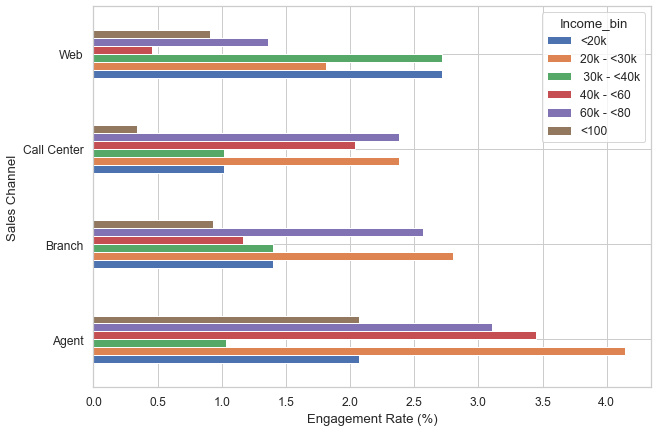

In [46]:
ax = (by_sales_channel_income).plot(
    kind='barh',
    figsize=(10, 7),
)
ax.set_xlabel('Engagement Rate (%)');


> Highest engagement interms of income is the (20  to 30 k income bin) through agent

In [66]:
df_num = df.select_dtypes('number')
df_num.head(1)

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147


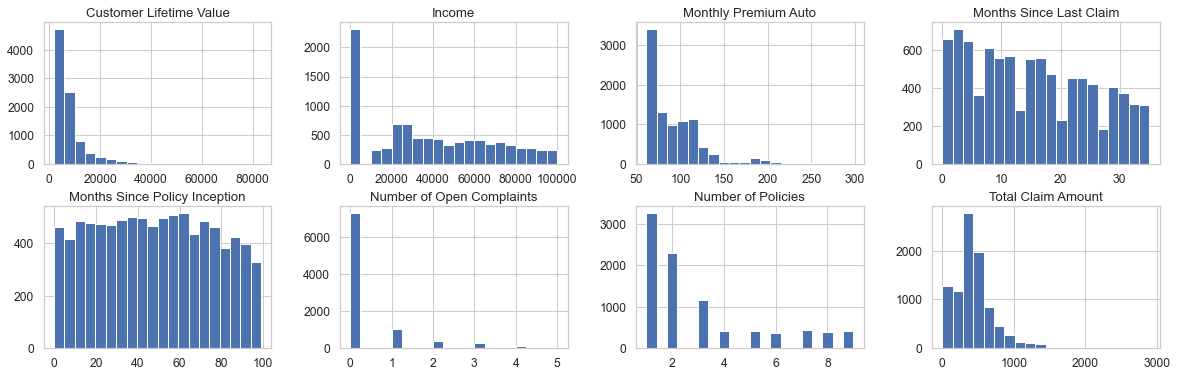

In [29]:
df_num.hist(bins = 20, figsize = (20,6), layout=(2,4));

In [51]:
df_cat = df.select_dtypes(include='object')
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Customer           9134 non-null   object
 1   State              9134 non-null   object
 2   Response           9134 non-null   object
 3   Coverage           9134 non-null   object
 4   Education          9134 non-null   object
 5   Effective To Date  9134 non-null   object
 6   EmploymentStatus   9134 non-null   object
 7   Gender             9134 non-null   object
 8   Location Code      9134 non-null   object
 9   Marital Status     9134 non-null   object
 10  Policy Type        9134 non-null   object
 11  Policy             9134 non-null   object
 12  Renew Offer Type   9134 non-null   object
 13  Sales Channel      9134 non-null   object
 14  Vehicle Class      9134 non-null   object
 15  Vehicle Size       9134 non-null   object
dtypes: object(16)
memory usage: 1.1+ MB


In [67]:
#filtering Categorical data
df_cat = df_cat[df_cat.columns[(df_cat.nunique().values)<=9]]

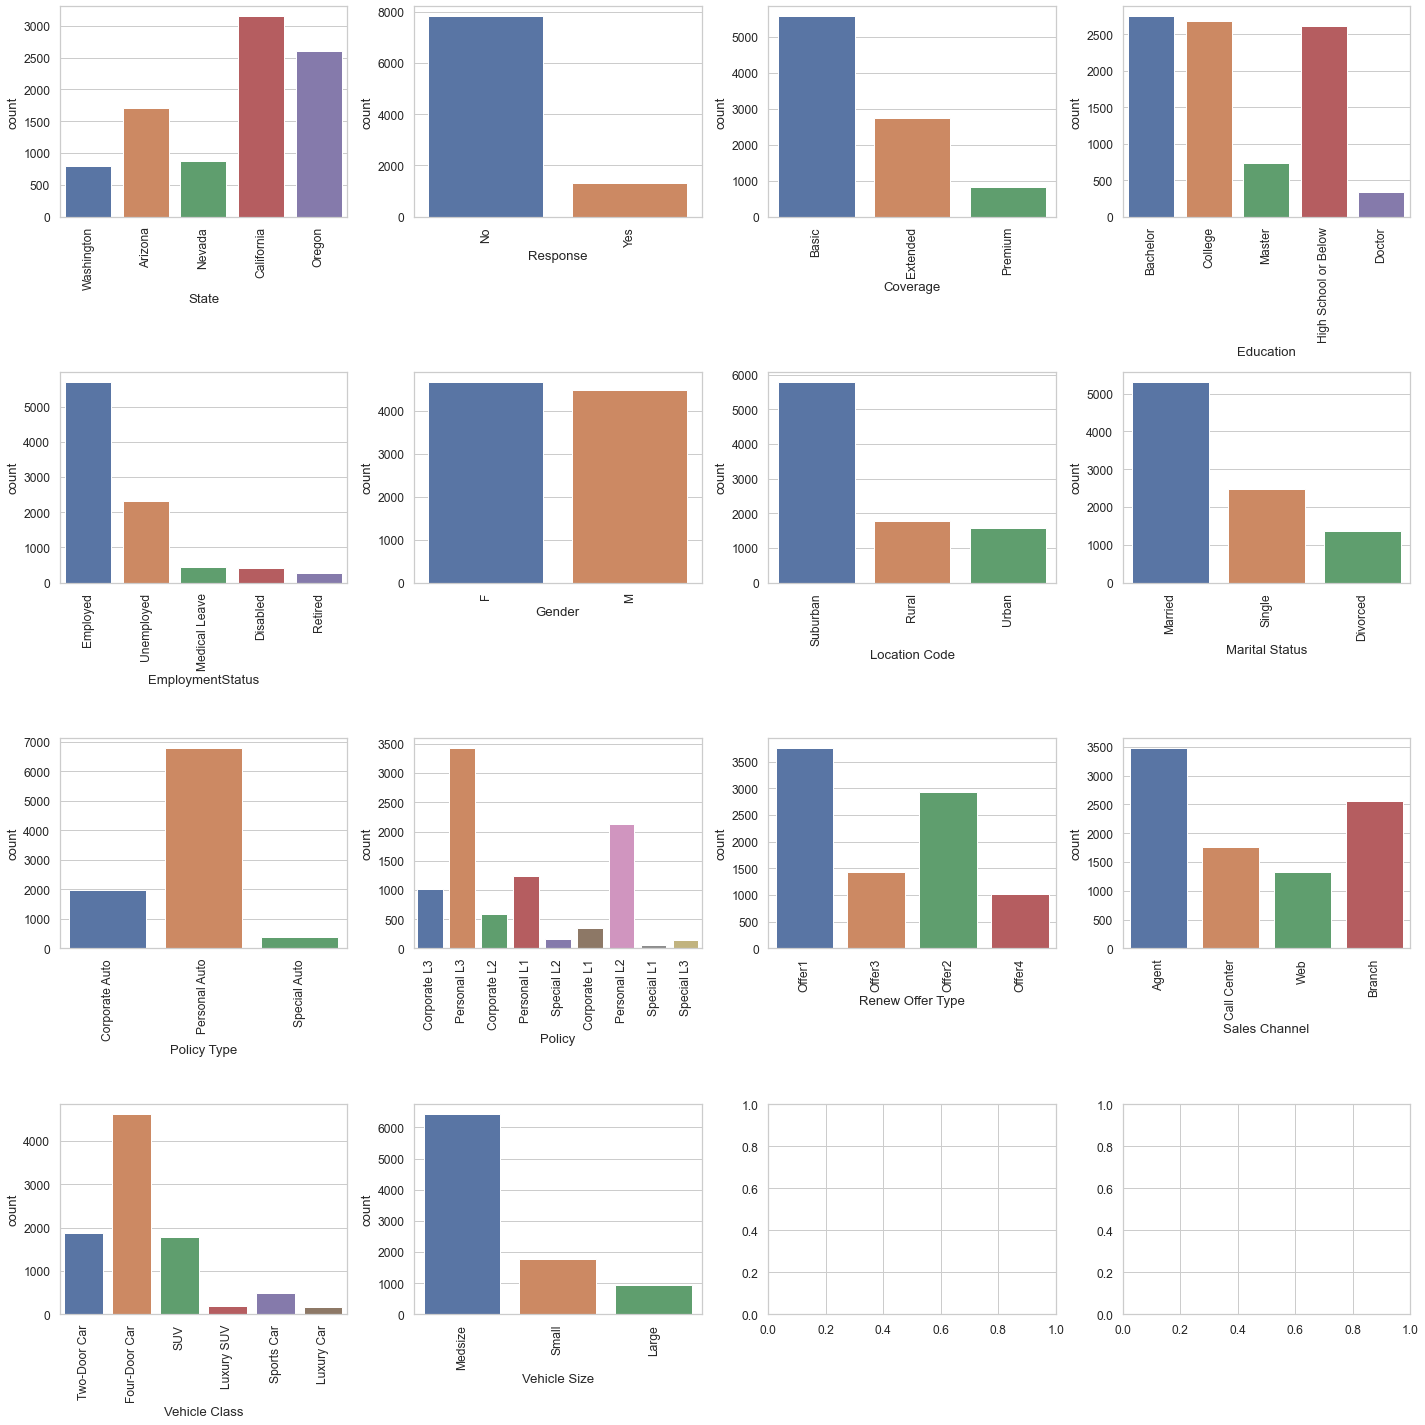

In [68]:
fig, ax = plt.subplots(4, 4, figsize=(20, 20))
for variable, subplot in zip(df_cat, ax.flatten()):
    sb.countplot(df_cat[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
plt.tight_layout();

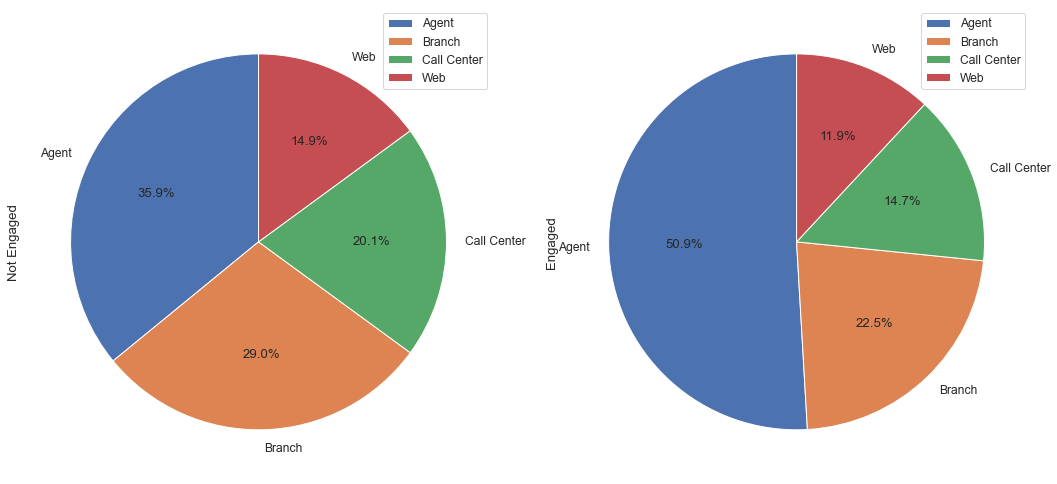

In [80]:
engagement_by_sales_channel.plot(kind = 'pie', startangle =90, autopct = '%.1f%%', figsize=(15,7), subplots=True)
plt.tight_layout();

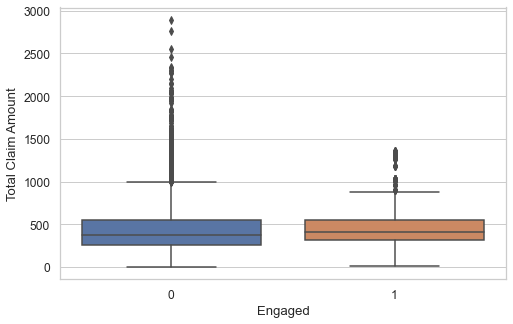

In [81]:
sb.boxplot(data= df, x='Engaged', y='Total Claim Amount');

> Total claim amount of engaged customers is slightly higher than the unengaged

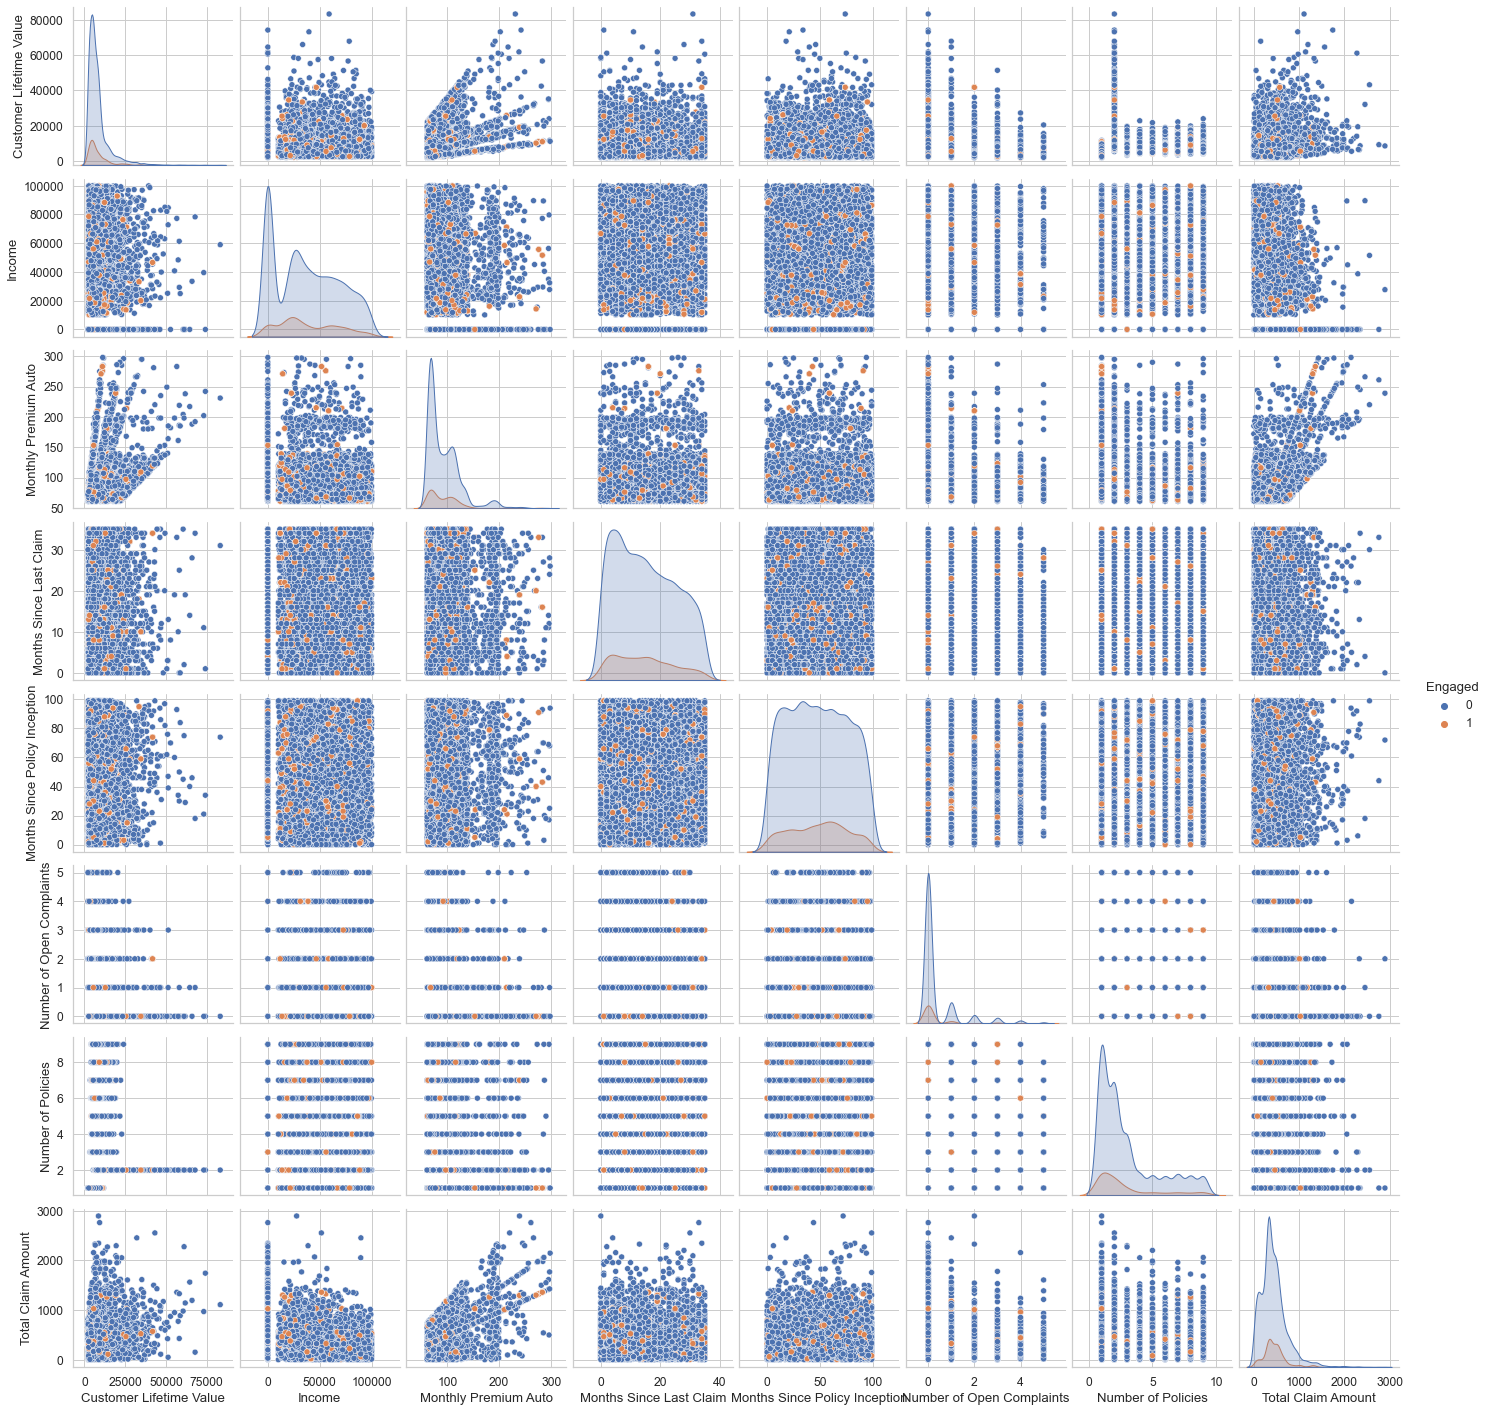

In [84]:
sb.pairplot(df, hue='Engaged');

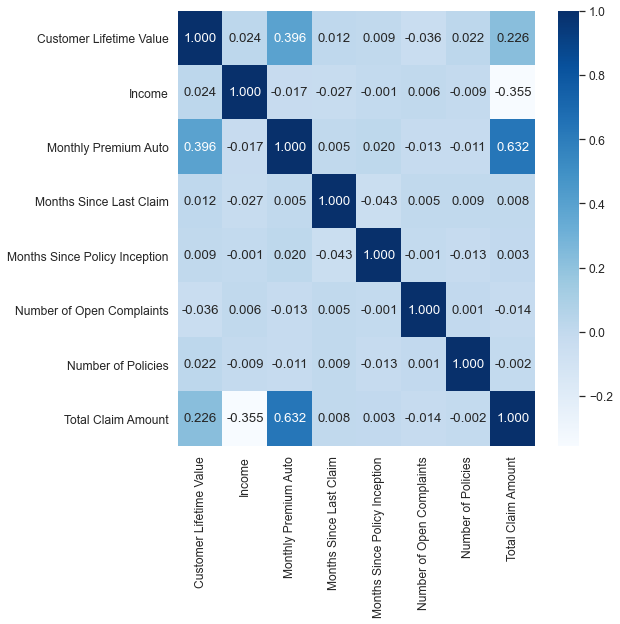

In [9]:
plt.figure(figsize=(8,8))
sb.heatmap(df.corr(), annot=True, cmap='Blues', fmt=".3f");

## Regression Analysis

In [15]:
logit = sm.Logit(df['Engaged'], df_num)

In [16]:
model = logit.fit()

Optimization terminated successfully.
         Current function value: 0.421189
         Iterations 6


In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Engaged   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9126
Method:                           MLE   Df Model:                            7
Date:                Wed, 07 Jul 2021   Pseudo R-squ.:                -0.02546
Time:                        00:56:04   Log-Likelihood:                -3847.1
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                     1.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Customer Lifetime Value       -6.741e-06   5.04e-06     -1.337      0.181   -1.66e-05    3.14e-06
Income                        -2.857e-06   1.03e-06     -2.766      0.006   -4.88e-06   -8.33e-07
Monthly Premium Auto             -0.0084      0.001     -6.889      0.000      -0.011      -0.006
Months Since Last Claim          -0.0202      0.003     -7.238      0.000      -0.026      -0.015
Months Since Policy Inception    -0.0060      0.001     -6.148      0.000      -0.008      -0.004
Number of Open Complaints        -0.0829      0.034     -2.424      0.015      -0.150      -0.016
Number of Policies               -0.0810      0.013     -6.356      0.000      -0.106      -0.056
Total Claim Amount                0.0001      0.000      0.711      0.477      -0.000       0.000
=================================================================================================
"""

> Looking at this model output, we can see that Income, Monthly Premium Auto, Months Since Last Claim, Months Since Policy Inception, and Number of Policies variables have significant relationships with the output variable, Engaged. 

- For example, Number of Policies variable is significant and is negatively correlated with Engaged. This suggests that the more policies that the customers have, the less likely they are to respond to marketing calls. 

- As another example, the **Months Since Last Claim** variable is significant and is negatively correlated with the output variable, Engaged. This means that the longer it has been since the last claim, the less likely that the customer is going to respond to marketing calls.

<a id='model'></a>
## Classification Model:
Preprocessing of the Data

In [59]:
df_c = df.copy()

In [60]:
df_c['Response'] = df_c['Response'].apply(lambda x: 1 if x == 'Yes' else 0)
df_c['Response'].value_counts()

0    7826
1    1308
Name: Response, dtype: int64

In [61]:
columns_to_encode = ['Sales Channel', 'Vehicle Size', 'Vehicle Class', 'Policy', 'Policy Type', 
                     'EmploymentStatus', 'Marital Status', 'Education', 'Coverage']

In [62]:
new_df = df_c[columns_to_encode]
new_df = pd.get_dummies(new_df)
new_df

,Sales Channel_Agent,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,...,Marital Status_Married,Marital Status_Single,Education_Bachelor,Education_College,Education_Doctor,Education_High School or Below,Education_Master,Coverage_Basic,Coverage_Extended,Coverage_Premium
0,1,0,0,0,0,1,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0
1,1,0,0,0,0,1,0,1,0,0,...,0,1,1,0,0,0,0,0,1,0
2,1,0,0,0,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
3,0,0,1,0,0,1,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0
4,1,0,0,0,0,1,0,1,0,0,...,0,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0,0,0,1,0,1,0,1,0,0,...,1,0,1,0,0,0,0,1,0,0
9130,0,1,0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
9131,0,1,0,0,0,1,0,1,0,0,...,0,1,1,0,0,0,0,0,1,0
9132,0,1,0,0,1,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0


In [64]:
df_c['is_female'] = df_c['Gender'].apply(lambda x: 1 if x =='F' else 0)

In [67]:
df_new = pd.concat([df_num, new_df, df_c['is_female']], axis = 1)

In [69]:
df_new.head(1)

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Sales Channel_Agent,Sales Channel_Branch,...,Marital Status_Single,Education_Bachelor,Education_College,Education_Doctor,Education_High School or Below,Education_Master,Coverage_Basic,Coverage_Extended,Coverage_Premium,is_female
0,2763.519279,56274,69,32,5,0,1,384.811147,1,0,...,0,1,0,0,0,0,1,0,0,1


In [70]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_new, df_c['Response'], test_size = 0.3, random_state = 42,
                                                    )

In [71]:
x_train.shape

(6393, 50)

In [72]:
y_test.shape

(2741,)

In [83]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, precision_recall_curve, roc_auc_score

In [74]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators= 200 , max_depth=5)
rf_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=200)

In [75]:
rf_df = pd.DataFrame(list(zip(rf_model.feature_importances_, df_new.columns)))

rf_df.columns = ['feature.importance', 'feature']

In [76]:
rf_df.sort_values(by='feature.importance', ascending=False, inplace=True, ignore_index=True)

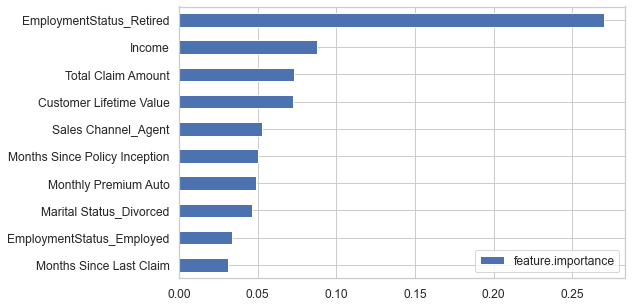

In [78]:
#plotting the Top 10 important features
rf_top_10feature = rf_df[:10]
rf_top_10feature.plot(kind = 'barh')
plt.yticks(range(0,len(rf_top_10feature)), rf_top_10feature.feature)
plt.gca().invert_yaxis();

In [79]:
y_pred = rf_model.predict(x_test)

In [85]:
from sklearn.metrics import roc_curve, auc
cr = classification_report(y_test, y_pred)
print(cr)

score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred),
                         'precision': precision_score(y_test, y_pred),
                         'recall': recall_score(y_test, y_pred),
                         'f1': f1_score(y_test, y_pred),
                         'auc': roc_auc_score(y_test, y_pred)},
                         index=pd.Index([1]))

print(score_df)

              precision    recall  f1-score   support

           0       0.86      1.00      0.93      2332
           1       0.92      0.11      0.20       409

    accuracy                           0.87      2741
   macro avg       0.89      0.55      0.56      2741
weighted avg       0.87      0.87      0.82      2741

   accuracy  precision    recall        f1       auc
1  0.865742   0.918367  0.110024  0.196507  0.554155


In [86]:
#taking the second column for the predicted probabilities of the positive class.
in_sample_preds = rf_model.predict_proba(x_train)[:,1]
out_sample_preds = rf_model.predict_proba(x_test)[:,1]
in_sample_fpr, in_sample_tpr, in_sample_thresholds = roc_curve(y_train, in_sample_preds)
out_sample_fpr, out_sample_tpr, out_sample_thresholds = roc_curve(y_test, out_sample_preds)

In [87]:
in_sample_roc_auc = auc(in_sample_fpr, in_sample_tpr)
out_sample_roc_auc = auc(out_sample_fpr, out_sample_tpr)

print('In-Sample AUC: %0.4f' % in_sample_roc_auc)
print('Out-Sample AUC: %0.4f' % out_sample_roc_auc)

In-Sample AUC: 0.8873
Out-Sample AUC: 0.8310


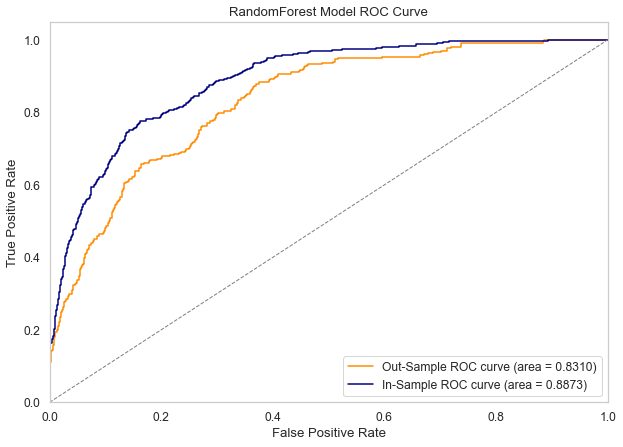

In [88]:
plt.figure(figsize=(10,7))

plt.plot(
    out_sample_fpr, out_sample_tpr, color='darkorange', label='Out-Sample ROC curve (area = %0.4f)' % out_sample_roc_auc
)
plt.plot(
    in_sample_fpr, in_sample_tpr, color='navy', label='In-Sample ROC curve (area = %0.4f)' % in_sample_roc_auc
)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.grid()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForest Model ROC Curve')
plt.legend(loc="lower right")

plt.show()

> Trying to improve the Performance of the Model with HyperTuning

In [89]:
#Fitting random forest models with a range of tree numbers and evaluate the out-of-bag error for each of these models.
RF = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [200, 300, 400, 450, 500]:
    
    # Use this to set the number of trees
    RF.set_params(n_estimators=n_trees)

    # Fit the model
    RF.fit(x_train, y_train)

    # Get the oob error
    oob_error = 1 - RF.oob_score_
    
    # Store it
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

rf_oob_df

,oob
n_trees,
200.0,0.007508
300.0,0.006726
400.0,0.006413
450.0,0.006570
500.0,0.006570


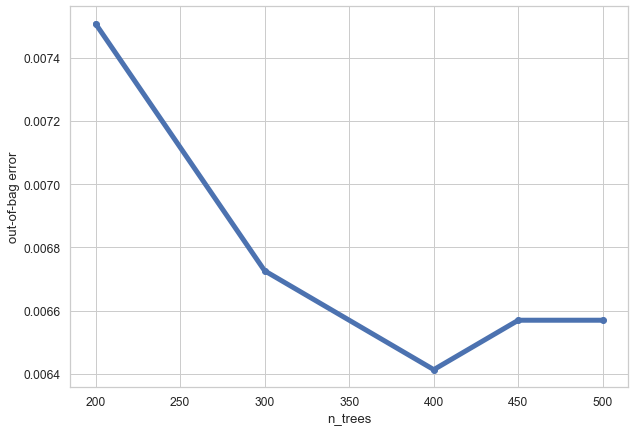

In [90]:
ax = rf_oob_df.plot(legend=False, marker='o', figsize=(10, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

In [91]:
#New Model with 400 estimators
model = RF.set_params(n_estimators=400)

y_pred = model.predict(x_test)

In [92]:
cr = classification_report(y_test, y_pred)
print(cr)

score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred),
                         'precision': precision_score(y_test, y_pred),
                         'recall': recall_score(y_test, y_pred),
                         'f1': f1_score(y_test, y_pred),
                         'auc': roc_auc_score(y_test, y_pred)},
                         index=pd.Index([1]))

print(score_df)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2332
           1       0.98      0.96      0.97       409

    accuracy                           0.99      2741
   macro avg       0.99      0.98      0.98      2741
weighted avg       0.99      0.99      0.99      2741

   accuracy  precision    recall       f1       auc
1  0.991609     0.9801  0.963325  0.97164  0.979947


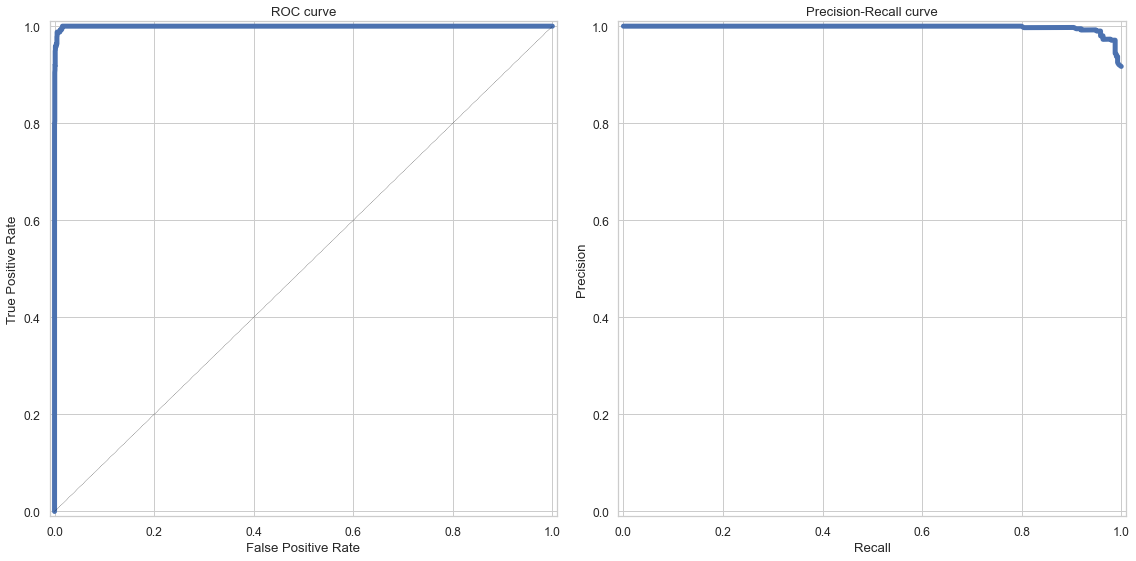

In [93]:
fig, axList = plt.subplots(ncols=2)
fig.set_size_inches(16, 8)

# Get the probabilities for each of the two categories
y_prob = model.predict_proba(x_test)

# Plot the ROC-AUC curve
ax = axList[0]

fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])
ax.plot(fpr, tpr, linewidth=5)
# It is customary to draw a diagonal dotted line in ROC plots.
# This is to indicate completely random prediction. Deviation from this
# dotted line towards the upper left corner signifies the power of the model.
ax.plot([0, 1], [0, 1], ls='--', color='black', lw=.3)
ax.set(xlabel='False Positive Rate',
       ylabel='True Positive Rate',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='ROC curve')
ax.grid(True)

# Plot the precision-recall curve
ax = axList[1]

precision, recall, _ = precision_recall_curve(y_test, y_prob[:,1])
ax.plot(recall, precision, linewidth=5)
ax.set(xlabel='Recall', ylabel='Precision',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='Precision-Recall curve')
ax.grid(True)

plt.tight_layout()

In [94]:
#taking the second column for the predicted probabilities of the positive class.
in_sample_preds = model.predict_proba(x_train)[:,1]
out_sample_preds = model.predict_proba(x_test)[:,1]

in_sample_fpr, in_sample_tpr, in_sample_thresholds = roc_curve(y_train, in_sample_preds)
out_sample_fpr, out_sample_tpr, out_sample_thresholds = roc_curve(y_test, out_sample_preds)

in_sample_roc_auc = auc(in_sample_fpr, in_sample_tpr)
out_sample_roc_auc = auc(out_sample_fpr, out_sample_tpr)

print('In-Sample AUC: %0.4f' % in_sample_roc_auc)
print('Out-Sample AUC: %0.4f' % out_sample_roc_auc)

In-Sample AUC: 1.0000
Out-Sample AUC: 0.9996


<a id='conclusions'></a>
## Conclusions

> EDA findings :
- Overall Engagement rate is 14%
- Offer2 had the highest engagement rate among the customers.
- Offer 2 customers owning a 4 door car seem to be the highest in engagement rate
- Customers' engagementrate is higher through "agent" sales channel 19% while call center is the lowest about 11 %
- Customers with Medsized vehicles have the highest engagement rate through agent then web then branch
- Highest engagement interms of income is the (20  to 30 k income bin) through agent
- Total claim amount of engaged customers is slightly higher than the unengaged

> Classification Models: 
- Random forest classification model worked well with 200 trees (estimators) to predict the positive class( Enagement response of 1) about 87% accurate but the recall rate was really low, given the imbalanced data.
- Tried different number of estimators using a For loop against the oob error, the best estimator was 400 estimators giving a 99 % accuracy and 96% recall rate.